In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Nykaa_skin_care.csv")

In [3]:
df.shape

(800, 5)

In [4]:
df.head(10)

,Product Name,Brand,Final Price,Discount,Rating
0,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Neutrogena,1071,10,4.5
1,CeraVe Moisturizer For Dry Skin with Ceramides...,CeraVe,387,10,4.4
2,Dot & Key Mango Detan Oil-Free Sunscreen Gel S...,Dot & Key,387,13,4.5
3,Forest Essentials Delicate Facial Cleanser - K...,Forest Essentials,1295,0,4.5
4,Eucerin Anti-Pigment Dual Serum With Thiamidol...,Eucerin,3213,15,4.2
5,SKIN1004 Madagascar Centella Tone Brightening ...,SKIN1004,899,10,4.4
6,The Ordinary Niacinamide 10% + Zinc 1%,The Ordinary,600,0,4.4
7,Estee Lauder Advanced Night Repair Synchronize...,Estee Lauder,4500,0,4.3
8,O3+ D -TAN Face Pack for Tan Removal & Glowing...,O3+,1442,7,4.3
9,CeraVe Foaming Cleanser Face Wash For Oily Ski...,CeraVe,468,10,4.4


# DATA PREPROCESSING


In [5]:
df.dtypes

Product Name     object
Brand            object
Final Price       int64
Discount          int64
Rating          float64
dtype: object

In [6]:
#checking for missing values
df.isnull().sum()

Product Name    0
Brand           0
Final Price     0
Discount        0
Rating          1
dtype: int64

In [7]:
df[df.duplicated()]

,Product Name,Brand,Final Price,Discount,Rating
30,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Neutrogena,1071,10,4.5
74,Deconstruct Lightweight Gel Sunscreen SPF 55+ ...,Deconstruct,314,10,4.4
96,Plum BodyLovin' Vanilla Caramello Bestselling ...,Plum,409,14,4.5
134,Raaga Professional De-Tan Removal Cream,Raaga Professional,373,10,4.4
141,The Derma Co Sali-Cinamide Anti-Acne Face Wash...,The Derma Co,232,7,4.4
284,Dr. Sheth's Ceramide & Vitamin C Oil - Free Mo...,Dr. Sheth's,314,10,4.4
455,Dr. Sheth's Kesar and Kojic Acid Sunscreen wit...,Dr. Sheth's,629,10,4.3


In [8]:
#dropped the duplicates

df.drop_duplicates(inplace=True)

In [9]:
df.shape

(793, 5)

In [10]:
df['Final Price'] = pd.to_numeric(df['Final Price'], errors='coerce')
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')


In [11]:
#Feature engineering [adding a column]
df['Original Price'] = df['Final Price'] / (1 - df['Discount']/100)


In [12]:
df.head(10)

,Product Name,Brand,Final Price,Discount,Rating,Original Price
0,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Neutrogena,1071,10,4.5,1190.000000
1,CeraVe Moisturizer For Dry Skin with Ceramides...,CeraVe,387,10,4.4,430.000000
2,Dot & Key Mango Detan Oil-Free Sunscreen Gel S...,Dot & Key,387,13,4.5,444.827586
3,Forest Essentials Delicate Facial Cleanser - K...,Forest Essentials,1295,0,4.5,1295.000000
4,Eucerin Anti-Pigment Dual Serum With Thiamidol...,Eucerin,3213,15,4.2,3780.000000
5,SKIN1004 Madagascar Centella Tone Brightening ...,SKIN1004,899,10,4.4,998.888889
6,The Ordinary Niacinamide 10% + Zinc 1%,The Ordinary,600,0,4.4,600.000000
7,Estee Lauder Advanced Night Repair Synchronize...,Estee Lauder,4500,0,4.3,4500.000000
8,O3+ D -TAN Face Pack for Tan Removal & Glowing...,O3+,1442,7,4.3,1550.537634
9,CeraVe Foaming Cleanser Face Wash For Oily Ski...,CeraVe,468,10,4.4,520.000000


In [14]:
#Filtering Rows
#Filtered top-rated or high-discount products:

df[df['Rating'] >= 4.5]

,Product Name,Brand,Final Price,Discount,Rating,Original Price
0,Neutrogena Hydro Boost Hyaluronic Acid Water G...,Neutrogena,1071,10,4.5,1190.000000
2,Dot & Key Mango Detan Oil-Free Sunscreen Gel S...,Dot & Key,387,13,4.5,444.827586
3,Forest Essentials Delicate Facial Cleanser - K...,Forest Essentials,1295,0,4.5,1295.000000
10,Cetaphil Gentle Skin Cleanser,Cetaphil,399,7,4.5,429.032258
13,Simple Kind To Skin Refreshing Facial Wash,Simple,357,15,4.5,420.000000
...,...,...,...,...,...,...
783,d'you Inbalance Soothing Milky Toner,d'you,2100,0,4.7,2100.000000
787,Dermatouch Kojic Acid 1% Soap With Glutathione,Dermatouch,136,20,4.5,170.000000
789,VT Cosmetics Reedle Shot 100,VT Cosmetics,2639,12,4.7,2998.863636
797,Earth Rhythm Reusable Makeup Remover & Cleansi...,Earth Rhythm,149,25,4.5,198.666667


In [15]:
#GroupBy Operations
#Average price and rating per brand:
df.groupby('Brand')['Final Price'].mean()
df.groupby('Brand')['Rating'].mean()

Brand
52 Sundaze          4.600000
AXIS-Y              4.400000
Aestura             4.700000
Ahaglow             4.400000
Aminu               4.350000
                      ...   
Winston             4.300000
Wishcare            4.427273
d'you               4.360000
e.l.f. Cosmetics    4.450000
inde wild           4.500000
Name: Rating, Length: 152, dtype: float64

In [16]:
#Value Counts
#Number of products per brand:
df['Brand'].value_counts()

Brand
Dot & Key       48
Plum            35
Minimalist      34
The Derma Co    33
Foxtale         30
                ..
Lancome          1
SUGAR POP        1
Venusia          1
AXIS-Y           1
L'Occitane       1
Name: count, Length: 152, dtype: int64

# DATA VISUALIZATION

## univariarte

Text(0.5, 1.0, 'Distribution of Final Price')

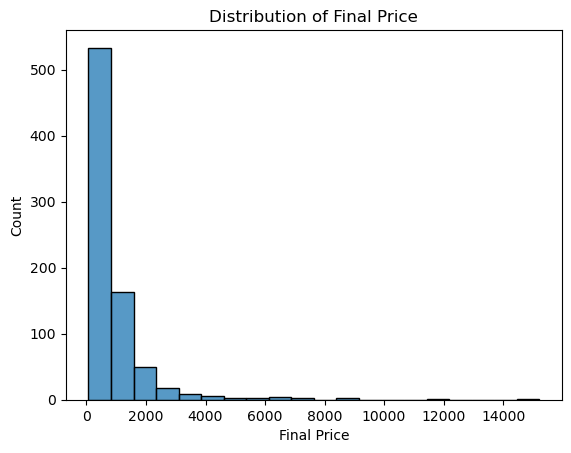

In [18]:
#a) Histogram
#To see the frequency distribution:


import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Final Price'], bins=20)
plt.title("Distribution of Final Price")

Text(0.5, 1.0, 'Boxplot of Ratings')

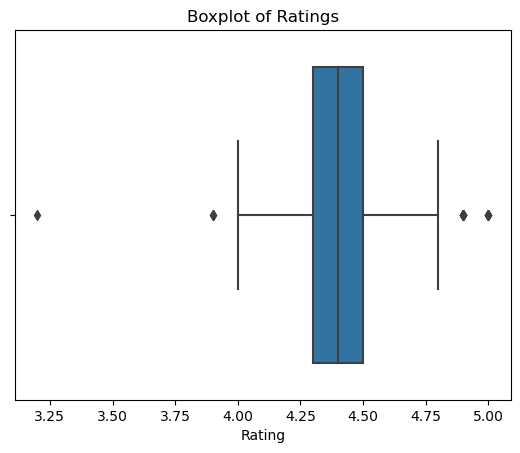

In [19]:
#b) Boxplot
#To detect outliers and spread:
sns.boxplot(x=df['Rating'])
plt.title("Boxplot of Ratings")

<Axes: xlabel='Discount', ylabel='Density'>

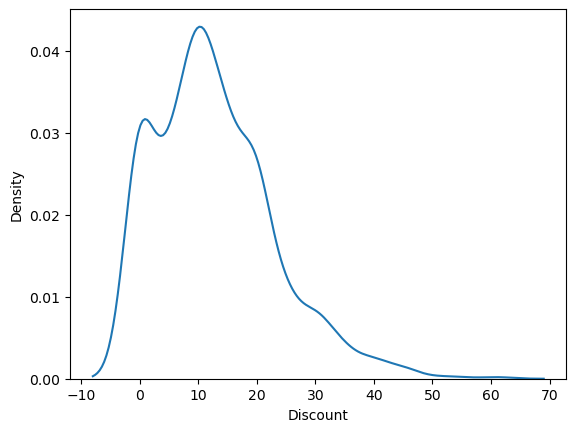

In [20]:
#c) KDE Plot
#To visualize distribution smoothly:

sns.kdeplot(df['Discount'])

Text(0.5, 1.0, 'Top 10 Brands by Product Count')

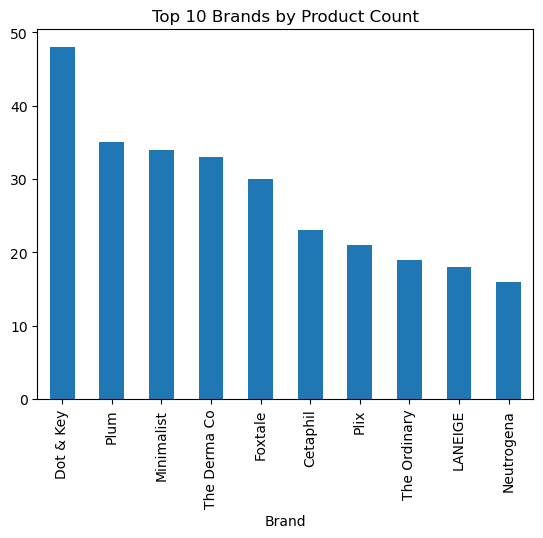

In [21]:
#a) Bar Chart
#Top 10 brands by count:
df['Brand'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Brands by Product Count")

## 2.bivariate

<Axes: xlabel='Final Price', ylabel='Discount'>

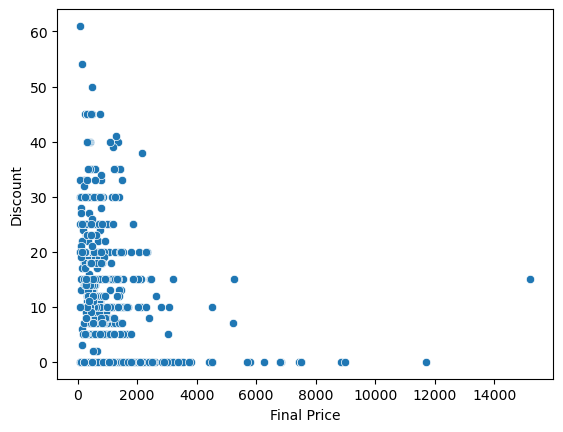

In [22]:
# 1. Final Price vs Discount
#Objective: Check if expensive products offer more or fewer discounts
#Method: Scatter plot or correlation

sns.scatterplot(x='Final Price', y='Discount', data=df)
#Insight: If you see an upward trend, costlier items may offer higher discounts.

<Axes: xlabel='Final Price', ylabel='Rating'>

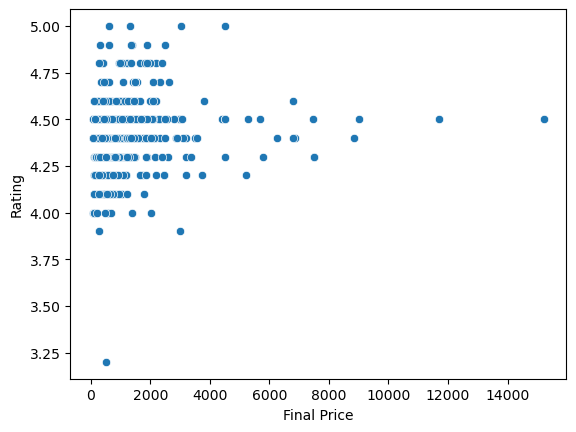

In [24]:
#2. Final Price vs Rating
#Objective: See whether price affects customer satisfaction
#Insight: If there’s no pattern, pricing may not affect how customers rate a product.

sns.scatterplot(x='Final Price', y='Rating', data=df)

<Axes: xlabel='Brand'>

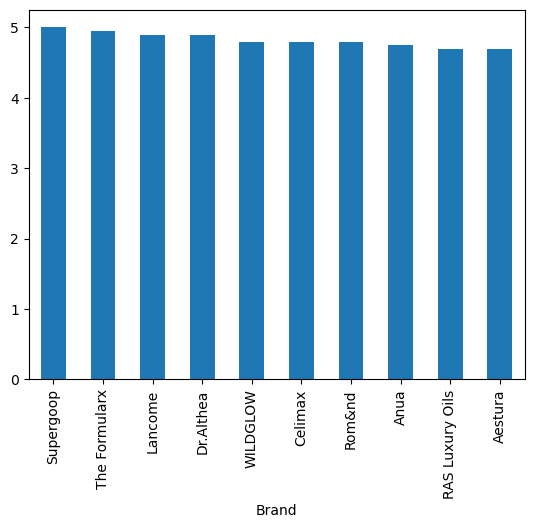

In [25]:
#3. Brand vs Average Rating
#Objective: Compare brands based on how well-rated their products are
#Insight: Identifies which brands are most appreciated by customers.

avg_rating = df.groupby('Brand')['Rating'].mean().sort_values(ascending=False).head(10)
avg_rating.plot(kind='bar')


<Axes: xlabel='Brand'>

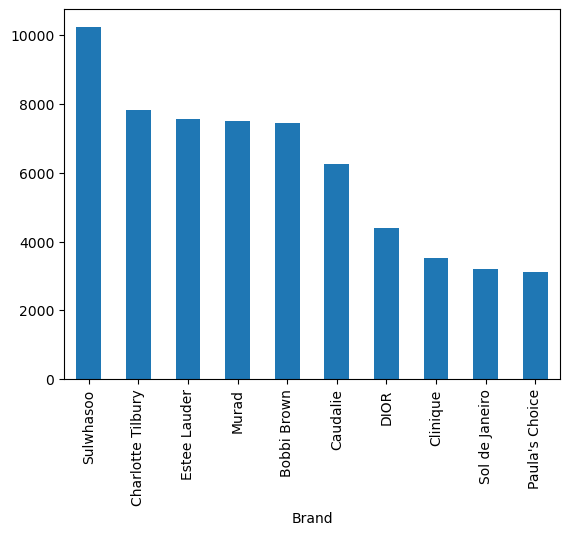

In [27]:
# 4. Brand vs Average Final Price
#Objective: Compare brand affordability
#Insight: See which brands are premium and which are budget-friendly.

avg_price = df.groupby('Brand')['FinalPrice'].mean().sort_values(ascending=False).head(10)
avg_price.plot(kind='bar')


<Axes: xlabel='Brand'>

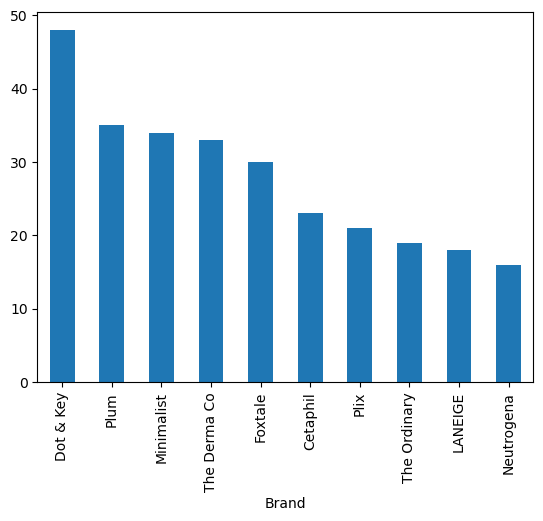

In [28]:
#2. Top Brands by Product Count
#Type: Bar chart
#Purpose: Show brands with the most skincare products listed

df['Brand'].value_counts().head(10).plot(kind='bar')

<Axes: xlabel='Brand'>

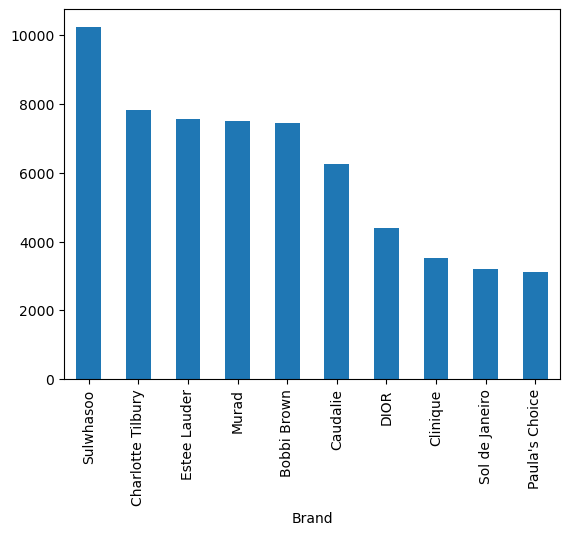

In [29]:
#3. Average Price by Brand
#Type: Bar chart or boxplot
#Purpose: Compare pricing strategies of different brands

df.groupby('Brand')['Final Price'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='Discount', ylabel='Count'>

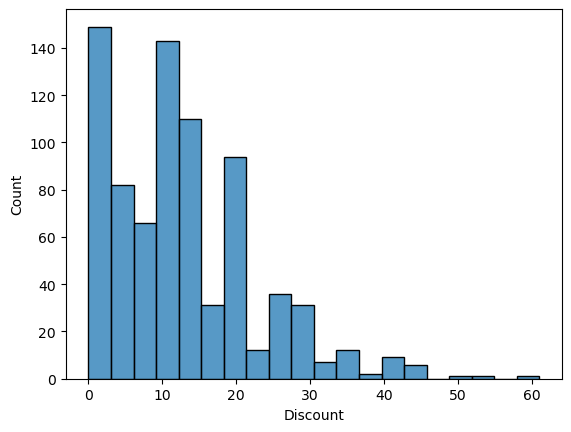

In [30]:
#4. Discount Distribution
#Type: Histogram
#Purpose: Understand how discounts are spread across products

sns.histplot(df['Discount'], bins=20)

<Axes: xlabel='Brand', ylabel='Final Price'>

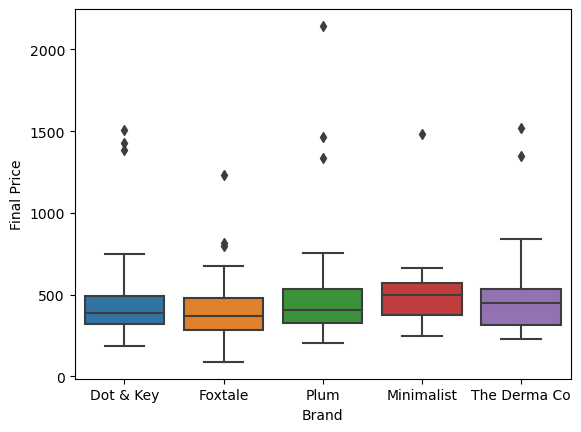

In [32]:
#6. Boxplot of Price by Brand
#Type: Boxplot
#Purpose: Spot pricing variation within top brands

top_brands = df['Brand'].value_counts().head(5).index
sns.boxplot(data=df[df['Brand'].isin(top_brands)], x='Brand', y='Final Price')

<Axes: >

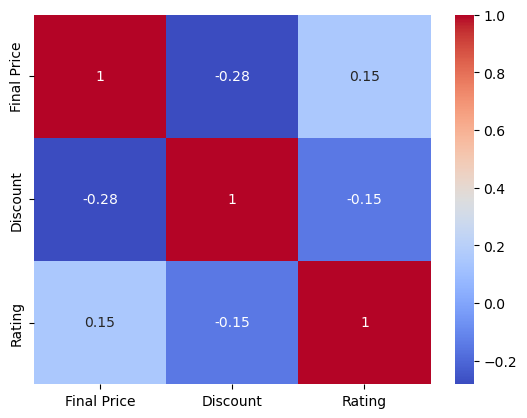

In [33]:
#7. Correlation Heatmap
#Type: Heatmap
#Purpose: Find relationships between numeric features

sns.heatmap(df[['Final Price', 'Discount', 'Rating']].corr(), annot=True, cmap='coolwarm')

Text(0.5, 1.0, 'Top 10 Discounted Products')

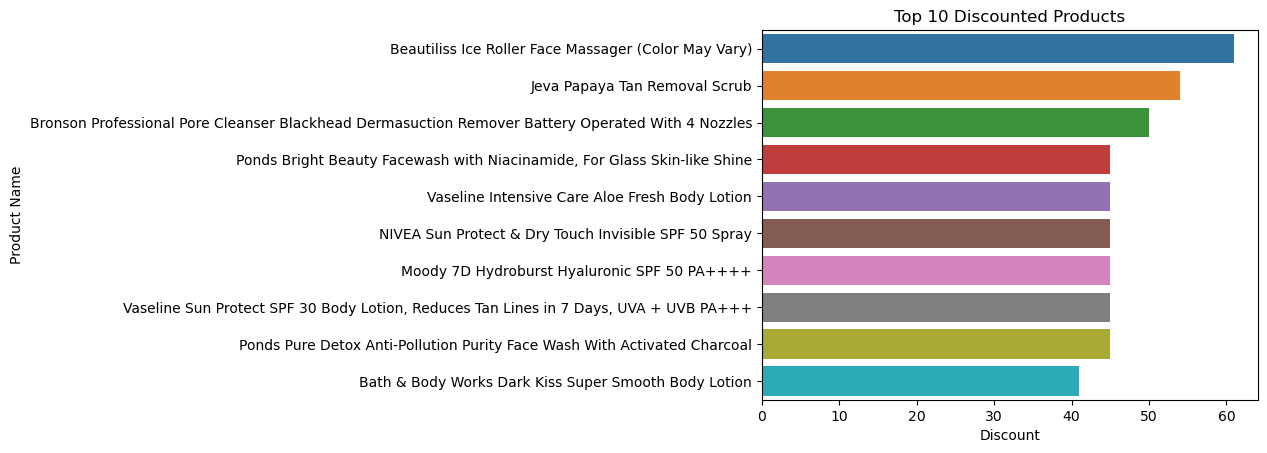

In [34]:
#8. Top Discounted Products
#Type: Horizontal bar chart
#Purpose: See which products offer the highest discounts

top_discounts = df.sort_values(by='Discount', ascending=False).head(10)
sns.barplot(data=top_discounts, y='Product Name', x='Discount')
plt.title("Top 10 Discounted Products")